In [9]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('/Users/kk/Desktop/da_capstone_group3/Team3_App/df_merged_etf_fixed.csv')
df.columns

Index(['Unnamed: 0', 'ticker', 'one_yr_return', 'expense_ratio', 'aum',
       'dividend_yield', 'fundname', 'esg_rating', 'quality_score',
       'score_peer_rank', 'score_global_rank', 'carbon_intensity',
       'sustainable_impact_exposure', 'sri_screening_criteria_exposure',
       'analyst_pick', 'grade', 'efficiency', 'tradability', 'fit', 'segment',
       'one_mo_p_percent', 'three_mo_p_percent', 'ytd_p_percent',
       'one_yr_p_percent', 'three_yr_p_percent', 'five_yr_p_percent',
       'ten_yr_p_percent', 'one_mo', 'three_mo', 'ytd', 'one_yr', 'three_yr',
       'as_of_date'],
      dtype='object')

In [11]:
performance = df[['one_mo_p_percent', 'three_mo_p_percent', 'ytd_p_percent',
       'one_yr_p_percent', 'three_yr_p_percent', 'five_yr_p_percent',
       'ten_yr_p_percent']]



In [12]:
performance

,one_mo_p_percent,three_mo_p_percent,ytd_p_percent,one_yr_p_percent,three_yr_p_percent,five_yr_p_percent,ten_yr_p_percent
0,5.13,12.57,20.00,17.03,14.09,11.79,12.48
1,5.14,12.61,20.04,17.08,14.15,11.82,12.54
2,5.15,12.62,20.09,17.09,14.15,11.82,12.55
3,5.56,12.94,19.61,16.46,13.42,10.98,11.98
4,4.48,22.36,42.66,27.05,14.71,16.50,18.66
...,...,...,...,...,...,...,...
3163,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3164,-17.10,-58.45,-74.30,NaN,NaN,NaN,NaN
3165,NaN,NaN,NaN,NaN,-24.56,-13.17,NaN
3166,4.45,7.88,NaN,NaN,NaN,NaN,NaN


In [13]:
performance = pd.DataFrame(performance)
performance.rename(columns={'one_mo_p_percent': '1 mo', 'three_mo_p_percent': '3 mo', 'ytd_p_percent': '9 mo', 'one_yr_p_percent': '12 mo', 'three_yr_p_percent': '36 mo', 'five_yr_p_percent': '60 mo', 'ten_yr_p_percent': '120 mo'}, inplace=True)
performance.head()

,1 mo,3 mo,9 mo,12 mo,36 mo,60 mo,120 mo
0,5.13,12.57,20.00,17.03,14.09,11.79,12.48
1,5.14,12.61,20.04,17.08,14.15,11.82,12.54
2,5.15,12.62,20.09,17.09,14.15,11.82,12.55
3,5.56,12.94,19.61,16.46,13.42,10.98,11.98
4,4.48,22.36,42.66,27.05,14.71,16.50,18.66


In [14]:
performance= performance.drop('ticker', axis=1)
performance.head()

KeyError: "['ticker'] not found in axis"

In [15]:
x = [1, 3, 9, 12, 36, 60, 120]

for i in performance:
    y= pd.DataFrame(performance[i].astype(float))
   




In [16]:
for ticker in performance.index:
    df_performance = dict({ticker[i] : (x, y)} for ticker in performance.columns)
    df_performance

TypeError: string indices must be integers, not 'str'

In [17]:
for i in performance:
    performance.index = pd.DataFrame(df['ticker'])

In [18]:
df_performance = [[ {ticker : (x, y)}] for ticker in performance.columns]


In [19]:
df_performance = pd.DataFrame(df_performance.reset_index())


AttributeError: 'list' object has no attribute 'reset_index'

In [20]:
df_performance

[[{'1 mo': ([1, 3, 9, 12, 36, 60, 120],
          120 mo
    0      12.48
    1      12.54
    2      12.55
    3      11.98
    4      18.66
    ...      ...
    3163     NaN
    3164     NaN
    3165     NaN
    3166     NaN
    3167     NaN
    
    [3168 rows x 1 columns])}],
 [{'3 mo': ([1, 3, 9, 12, 36, 60, 120],
          120 mo
    0      12.48
    1      12.54
    2      12.55
    3      11.98
    4      18.66
    ...      ...
    3163     NaN
    3164     NaN
    3165     NaN
    3166     NaN
    3167     NaN
    
    [3168 rows x 1 columns])}],
 [{'9 mo': ([1, 3, 9, 12, 36, 60, 120],
          120 mo
    0      12.48
    1      12.54
    2      12.55
    3      11.98
    4      18.66
    ...      ...
    3163     NaN
    3164     NaN
    3165     NaN
    3166     NaN
    3167     NaN
    
    [3168 rows x 1 columns])}],
 [{'12 mo': ([1, 3, 9, 12, 36, 60, 120],
          120 mo
    0      12.48
    1      12.54
    2      12.55
    3      11.98
    4      18.66
    ...      .

In [21]:
sns.lineplot(data=performance.index[1], x=x, y=y)

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [22]:
performance = performance.set_index('ticker')
performance.head()

KeyError: "None of ['ticker'] are in the columns"

In [23]:
performance = performance.groupby('ticker')
performance.head()

KeyError: 'ticker'

In [ ]:
perfomance.columns.values.tolist()

In [ ]:
performance_df = pd.DataFrame()

for ticker, ticker_df in performance:
    x=['1 mo', '3 mo', '9 mo', '12 mo', '36 mo', '60 mo', '120 mo']
    i= perfomance.columns[ticker]
    y = i.values.tolist()


    sns.lineplot(data=ts, x=x, y=y, hue=index)

In [ ]:
performance = performance.T

In [ ]:
performance = pd.DataFrame(performance)


performance['month'] = ['1 mo', '3 mo', '9 mo', '12 mo', '36 mo', '60 mo', '120 mo']
performance = performance.set_index('month')
performance.head()

ValueError: Length of values (7) does not match length of index (3168)

In [ ]:
performance = performance.sortby('ticker')

AttributeError: 'DataFrame' object has no attribute 'sortby'

In [ ]:
sns.lineplot(data=performance.head(1), performance.ticker=['SPY'	,'IVV' , 'VOO',	'VTI',	'QQQ'] palette="tab10", linewidth=0.5)

In [ ]:
performance.to_csv('performance.csv')

In [ ]:
for i in range(3168):
    p[i] = df.ticker[i]
    print(p[i])



In [24]:
ts = pd.DataFrame(performance, index=df['ticker'])  # Replace index with your tickers
ts.Ticker = df[

SyntaxError: incomplete input (2182940416.py, line 2)

In [25]:
df.ticker

0        SPY
1        IVV
2        VOO
3        VTI
4        QQQ
        ... 
3163    AVNM
3164    SPKY
3165    FLRU
3166    SROI
3167    CETF
Name: ticker, Length: 3168, dtype: object

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


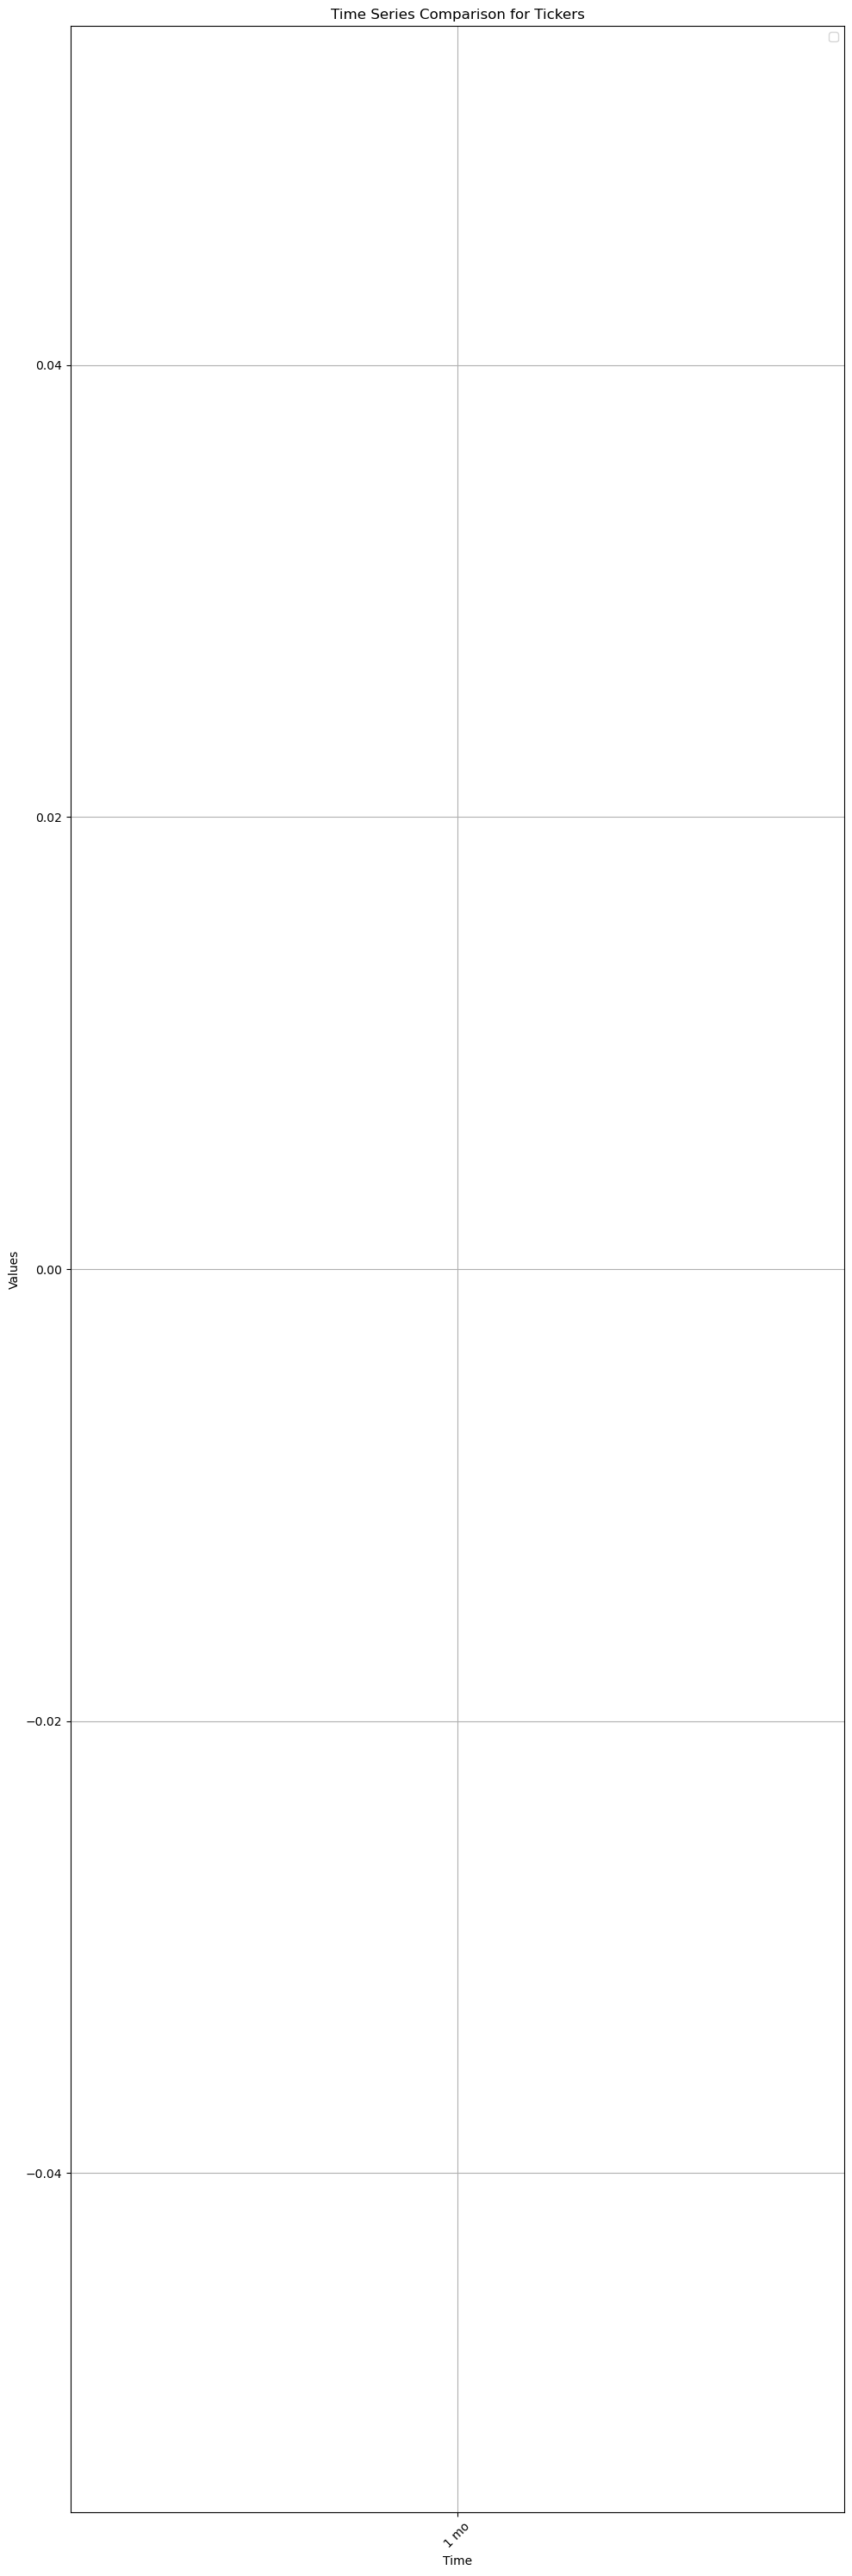

In [26]:
ts = pd.DataFrame(performance.head(50), index=df['ticker'].head(50))  # Replace index with your tickers

# Plotting
plt.figure(figsize=(10, 30))

for ticker in ts.index:
    plt.plot(ts.columns, ts.loc[ticker])

plt.xlabel("Time")
plt.ylabel("Values")
plt.title("Time Series Comparison for Tickers")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

In [ ]:
performance = perfomance.rename(columns={'one_mo_p_percent':'1 Month', 'three_mo_p_percent':'3 Month', 'ytd_p_percent':'9 Month', 'one_yr_p_percent':'1 Year', 'three_yr_p_percent':'3 Year', 'five_yr_p_percent':'5 Year', 'ten_yr_p_percent':'10 Year'})
performance

NameError: name 'perfomance' is not defined

In [ ]:
month= [1,3,9,12,36,60,120]
def plots():
    for i in performance.ticker:
        plt.figure(figsize=(10,6))
        plt.title([i])
        plt.ylabel('performance [%]')
        plt.xlabel('time in months')
        sns.lineplot(x= month, y= performance.loc[i], )
        plt.show()

In [ ]:
plots()

AttributeError: 'DataFrame' object has no attribute 'ticker'

In [ ]:
month = [1, 3, 9, 12, 36, 60, 120]
ts['SPY'] = pd.DataFrame(indexs=month, index=performance.loc['SPY'])

ts['SPY'] 





KeyError: 'SPY'

In [27]:
month

NameError: name 'month' is not defined

In [ ]:
performance = performance.T
performance = performance.rename(columns={'ticker':'month'})
performance = pd.concat([performance, month], axis=0)
performance['month'] = month

TypeError: cannot concatenate object of type '<class 'list'>'; only Series and DataFrame objs are valid

In [ ]:
performance.head(20)

In [ ]:
#performance.index =['1', '3', '9', '12', '36', '60', '120']

#performance= performance.drop('level_0', axis=1)
performance= performance.drop('index', axis=1)
performance

In [ ]:

performance

In [ ]:
performance 


In [ ]:
sns.lineplot(data=perfomance, x='index', y='values')

-------

In [28]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import yfinance as yf
import yahooquery as yq
from yahooquery import Ticker
from yfinance import ticker
import googlefinance as gf
from googlefinance import getQuotes
import requests
import json
from json import dumps
from json import loads
import datetime as dt
from datetime import datetime
import streamlit as st


In [29]:
selection = pd.read_csv('/Users/kk/Desktop/da_capstone_group3/Team3_App/buraks_list49.csv')
selection.head()


,Unnamed: 0,start_config,one_yr_return,expense_ratio,aum,dividend_yield,quality_score,score_peer_rank,score_global_rank,carbon_intensity,...,investment_strategy,asset_region,subsegment,ticker,three_mo_p_percent,dividend_yield_cat,carbon_intensity_cat,aum_cat,quality_score_cat,ranking
0,79,lightgray,21.31,0.11,1.933000e+10,2.99,7.82,94.27,38.17,93.80,...,standard,europe,total_market,VGK,2.80,q4,q2,high,high,NaN
1,159,lightgray,28.67,0.52,8.370000e+09,2.81,7.85,94.72,40.60,123.75,...,standard,europe,total_market,EZU,3.00,q4,q2,high,high,NaN
2,169,lightgray,21.73,0.09,7.660000e+09,2.98,7.91,96.00,51.26,100.13,...,standard,europe,total_market,BBEU,2.41,q4,q2,high,high,NaN
3,259,lightgray,20.95,0.09,4.360000e+09,2.97,7.82,94.14,37.32,101.02,...,standard,europe,total_market,IEUR,2.35,q4,q2,high,high,NaN
4,341,lightgray,15.10,0.50,2.860000e+09,3.84,7.94,96.35,55.57,80.41,...,standard,europe,total_market,EWU,2.00,high,q2,high,high,NaN


In [30]:
performance = selection[['one_mo_p_percent', 'three_mo_p_percent', 'ytd_p_percent', 'one_yr_p_percent', 'three_yr_p_percent', 'five_yr_p_percent', 'ten_yr_p_percent']]

for i in selection: 
    performance.T.rename(columns={i : 'ticker[i]'}, inplace=True) 

In [31]:
p_selection = pd.DataFrame(performance.T)

p_selection = pd.concat([p_selection, selection['ticker']], axis=1)

p_selection

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,ticker
one_mo_p_percent,5.02,4.76,4.68,4.99,4.53,4.21,4.64,3.80,8.48,4.11,...,3.37,3.98,5.35,4.54,2.59,5.01,4.06,3.20,4.47,NaN
three_mo_p_percent,2.80,3.00,2.41,2.35,2.00,3.02,2.37,2.75,7.88,2.87,...,-3.96,2.85,2.81,1.28,2.67,2.95,0.29,-1.67,1.02,NaN
ytd_p_percent,16.50,19.90,16.33,16.05,11.19,22.36,16.51,20.44,19.02,20.74,...,-2.44,21.07,17.31,9.70,18.09,12.42,14.48,4.63,21.13,NaN
one_yr_p_percent,21.31,28.67,21.73,20.95,15.10,35.36,21.91,29.49,35.07,24.14,...,4.31,30.42,22.46,6.94,23.85,10.39,13.57,9.50,29.84,NaN
three_yr_p_percent,9.56,9.39,9.93,9.53,12.33,10.60,9.84,3.18,14.83,13.09,...,1.18,3.66,9.04,6.19,7.21,6.44,4.89,12.98,13.57,NaN
five_yr_p_percent,5.00,4.42,5.23,4.87,2.84,5.95,5.13,1.16,3.35,7.21,...,0.68,1.94,4.93,0.12,4.94,2.37,3.57,4.63,6.82,NaN
ten_yr_p_percent,5.34,5.42,NaN,NaN,2.84,5.61,5.02,3.35,2.99,8.71,...,6.09,NaN,NaN,NaN,6.80,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VGK
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EZU
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BBEU


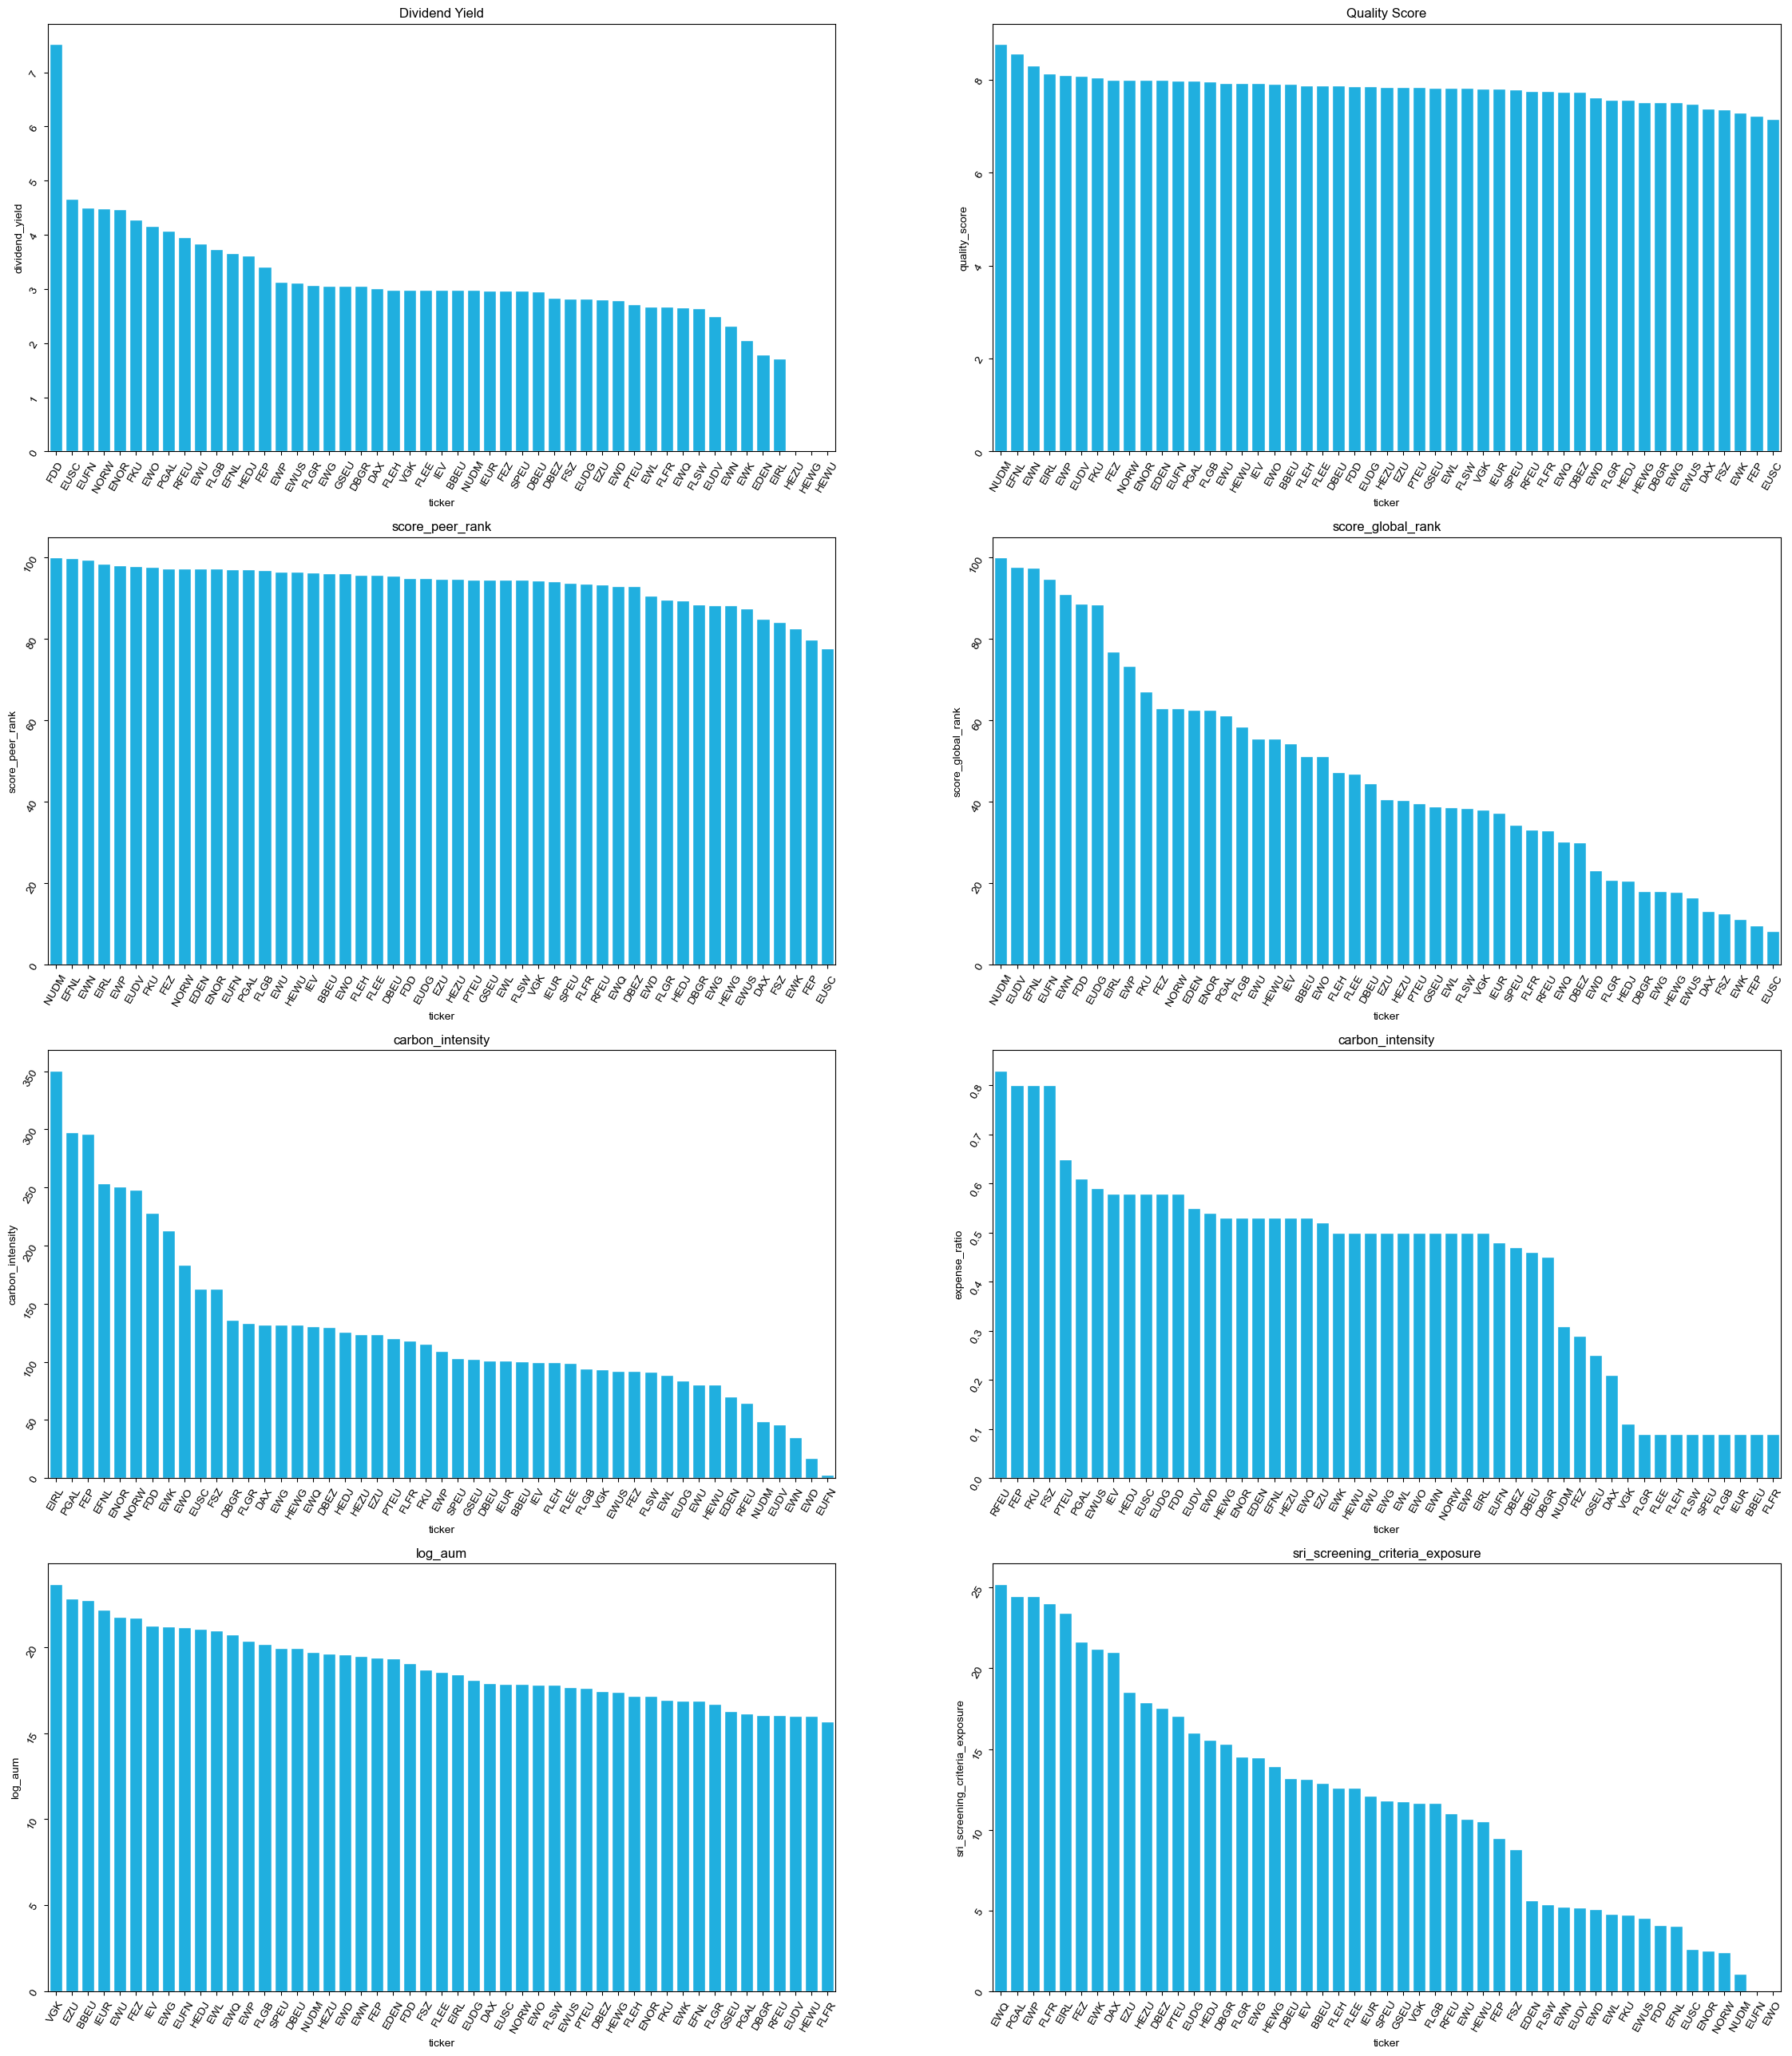

In [32]:

fig, ax = plt.subplots((4),(2), figsize=(28, 32))
sns.set_theme(style="whitegrid")
fig.get_constrained_layout_pads()
log_aum = np.log(selection.aum)
selection['log_aum'] = log_aum

#convert aum to log for plot 
log_aum = np.log(selection.aum)
selection['log_aum'] = log_aum


ax1=ax[0,0]
ax2=ax[0,1]
ax3=ax[1,0]
ax4=ax[1,1]
ax5=ax[2,0]
ax6=ax[2,1]
ax7=ax[3,0]
ax8=ax[3,1]



sns.barplot(x="ticker", y="dividend_yield", data=selection.sort_values(by='dividend_yield', ascending=False), color='deepskyblue', ax=ax1)
ax1.set_title('Dividend Yield')
ax1.tick_params(labelrotation=60)

sns.barplot(x="ticker", y="quality_score", data=selection.sort_values(by='quality_score', ascending=False), color='deepskyblue', ax=ax2)
ax2.set_title('Quality Score')
ax2.tick_params(labelrotation=60)

sns.barplot(x="ticker", y="score_peer_rank", data=selection.sort_values(by='score_peer_rank', ascending=False) ,ax=ax3, color='deepskyblue')
ax3.set_title('score_peer_rank')
ax3.tick_params(labelrotation=60)

sns.barplot(x="ticker", y="score_global_rank", data=selection.sort_values(by='score_global_rank', ascending=False),color='deepskyblue', ax=ax4)
ax4.set_title('score_global_rank')
ax4.tick_params(labelrotation=60)

sns.barplot(x="ticker", y="carbon_intensity", data=selection.sort_values(by='carbon_intensity', ascending=False),color='deepskyblue', ax=ax5)
ax5.set_title('carbon_intensity')
ax5.tick_params(labelrotation=60)

sns.barplot(x="ticker", y="expense_ratio", data=selection.sort_values(by='expense_ratio', ascending=False), color='deepskyblue',ax=ax6)
ax6.set_title('carbon_intensity')
ax6.tick_params(labelrotation=60)

sns.barplot(x="ticker", y= "log_aum", data=selection.sort_values(by = "log_aum", ascending=False), color='deepskyblue',ax=ax7)
ax7.set_title("log_aum")
ax7.tick_params(labelrotation=60)

sns.barplot(x="ticker", y='sri_screening_criteria_exposure', data=selection.sort_values(by='sri_screening_criteria_exposure', ascending=False), color='deepskyblue',ax=ax8)
ax8.set_title('sri_screening_criteria_exposure')
ax8.tick_params(labelrotation=60)


---------

In [33]:
selection.ticker

0      VGK
1      EZU
2     BBEU
3     IEUR
4      EWU
5      FEZ
6      IEV
7      EWG
8     EUFN
9     HEDJ
10     EWL
11     EWQ
12     EWP
13    FLGB
14    SPEU
15    DBEU
16    NUDM
17    HEZU
18     EWD
19     EWN
20     FEP
21    EDEN
22     FDD
23     FSZ
24    FLEE
25    EIRL
26    EUDG
27     DAX
28    EUSC
29    NORW
30     EWO
31    FLSW
32    EWUS
33    PTEU
34    DBEZ
35    HEWG
36    FLEH
37    ENOR
38     FKU
39     EWK
40    EFNL
41    FLGR
42    GSEU
43    PGAL
44    DBGR
45    RFEU
46    EUDV
47    HEWU
48    FLFR
Name: ticker, dtype: object

In [34]:
#get tickers from selection

t_list = selection.ticker
for t in t_list:
    t= selection.ticker.str.lower() 
    print(t)

0      vgk
1      ezu
2     bbeu
3     ieur
4      ewu
5      fez
6      iev
7      ewg
8     eufn
9     hedj
10     ewl
11     ewq
12     ewp
13    flgb
14    speu
15    dbeu
16    nudm
17    hezu
18     ewd
19     ewn
20     fep
21    eden
22     fdd
23     fsz
24    flee
25    eirl
26    eudg
27     dax
28    eusc
29    norw
30     ewo
31    flsw
32    ewus
33    pteu
34    dbez
35    hewg
36    fleh
37    enor
38     fku
39     ewk
40    efnl
41    flgr
42    gseu
43    pgal
44    dbgr
45    rfeu
46    eudv
47    hewu
48    flfr
Name: ticker, dtype: object
0      vgk
1      ezu
2     bbeu
3     ieur
4      ewu
5      fez
6      iev
7      ewg
8     eufn
9     hedj
10     ewl
11     ewq
12     ewp
13    flgb
14    speu
15    dbeu
16    nudm
17    hezu
18     ewd
19     ewn
20     fep
21    eden
22     fdd
23     fsz
24    flee
25    eirl
26    eudg
27     dax
28    eusc
29    norw
30     ewo
31    flsw
32    ewus
33    pteu
34    dbez
35    hewg
36    fleh
37    enor
38     fku
39  

In [35]:
from requests import get


for t in t_list:
    T =yq.Ticker('f"{selection.ticker[t]}"')
    print(T)

ts = pd.concat[T, selection.ticker]
print(get.json<object at 0x2d585d990>)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (1921886002.py, line 9)

In [36]:
s =yq.Ticker('f"{selection.ticker[t]}"')

for t in t_list:
    ts = s.history(period='max')
    print(s)



In [37]:
selection.loc['ticker = "NUDM"']

KeyError: 'ticker = "NUDM"'

In [38]:
nudm =yq.Ticker('NUDM')

ts = nudm.history(period='max')

In [39]:
print(ts)

                        open       high        low      close  volume  \
symbol date                                                             
NUDM   2017-06-12  24.969999  24.969999  24.969999  24.969999       0   
       2017-06-13  24.969999  24.969999  24.969999  24.969999       0   
       2017-06-14  25.070000  25.070000  25.070000  25.070000     500   
       2017-06-15  25.070000  25.070000  25.070000  25.070000       0   
       2017-06-16  25.070000  25.070000  25.070000  25.070000       0   
...                      ...        ...        ...        ...     ...   
       2023-08-21  27.660000  27.760000  27.530001  27.730000   64100   
       2023-08-22  27.830000  28.000000  27.610001  27.680000   22500   
       2023-08-23  27.830000  28.070000  27.802000  28.030001   34800   
       2023-08-24  27.900000  28.000999  27.580000  27.650000  149400   
       2023-08-25  27.830000  27.860001  27.629999  27.820000   20400   

                    adjclose  dividends  
symbol d

In [40]:
ts_nudm = pd.DataFrame(ts)

In [41]:
ts_nudm = ts_nudm.reset_index('date')
ts_nudm

,date,open,high,low,close,volume,adjclose,dividends
symbol,,,,,,,,
NUDM,2017-06-12,24.969999,24.969999,24.969999,24.969999,0,21.709028,0.0
NUDM,2017-06-13,24.969999,24.969999,24.969999,24.969999,0,21.709028,0.0
NUDM,2017-06-14,25.070000,25.070000,25.070000,25.070000,500,21.795967,0.0
NUDM,2017-06-15,25.070000,25.070000,25.070000,25.070000,0,21.795967,0.0
NUDM,2017-06-16,25.070000,25.070000,25.070000,25.070000,0,21.795967,0.0
...,...,...,...,...,...,...,...,...
NUDM,2023-08-21,27.660000,27.760000,27.530001,27.730000,64100,27.730000,0.0
NUDM,2023-08-22,27.830000,28.000000,27.610001,27.680000,22500,27.680000,0.0
NUDM,2023-08-23,27.830000,28.070000,27.802000,28.030001,34800,28.030001,0.0


In [42]:
ts_nudm['date'] = pd.to_datetime(ts_nudm['date'])

In [43]:
ts_nudm_fc = ts_nudm.rename(columns={'date':'ds', 'close':'y'})
ts_nudm_fc = ts_nudm_fc[['ds', 'y']]


In [44]:
s#elect_ts = pd.DataFrame()
for t in t_list:
    ts = s.history(period='max')
    ts = select_ts
ts = print(ts).to_csv('select_ts.csv')

NameError: name 'select_ts' is not defined

<Axes: title={'center': 'NUDM'}, xlabel='time in days', ylabel='price [$]'>

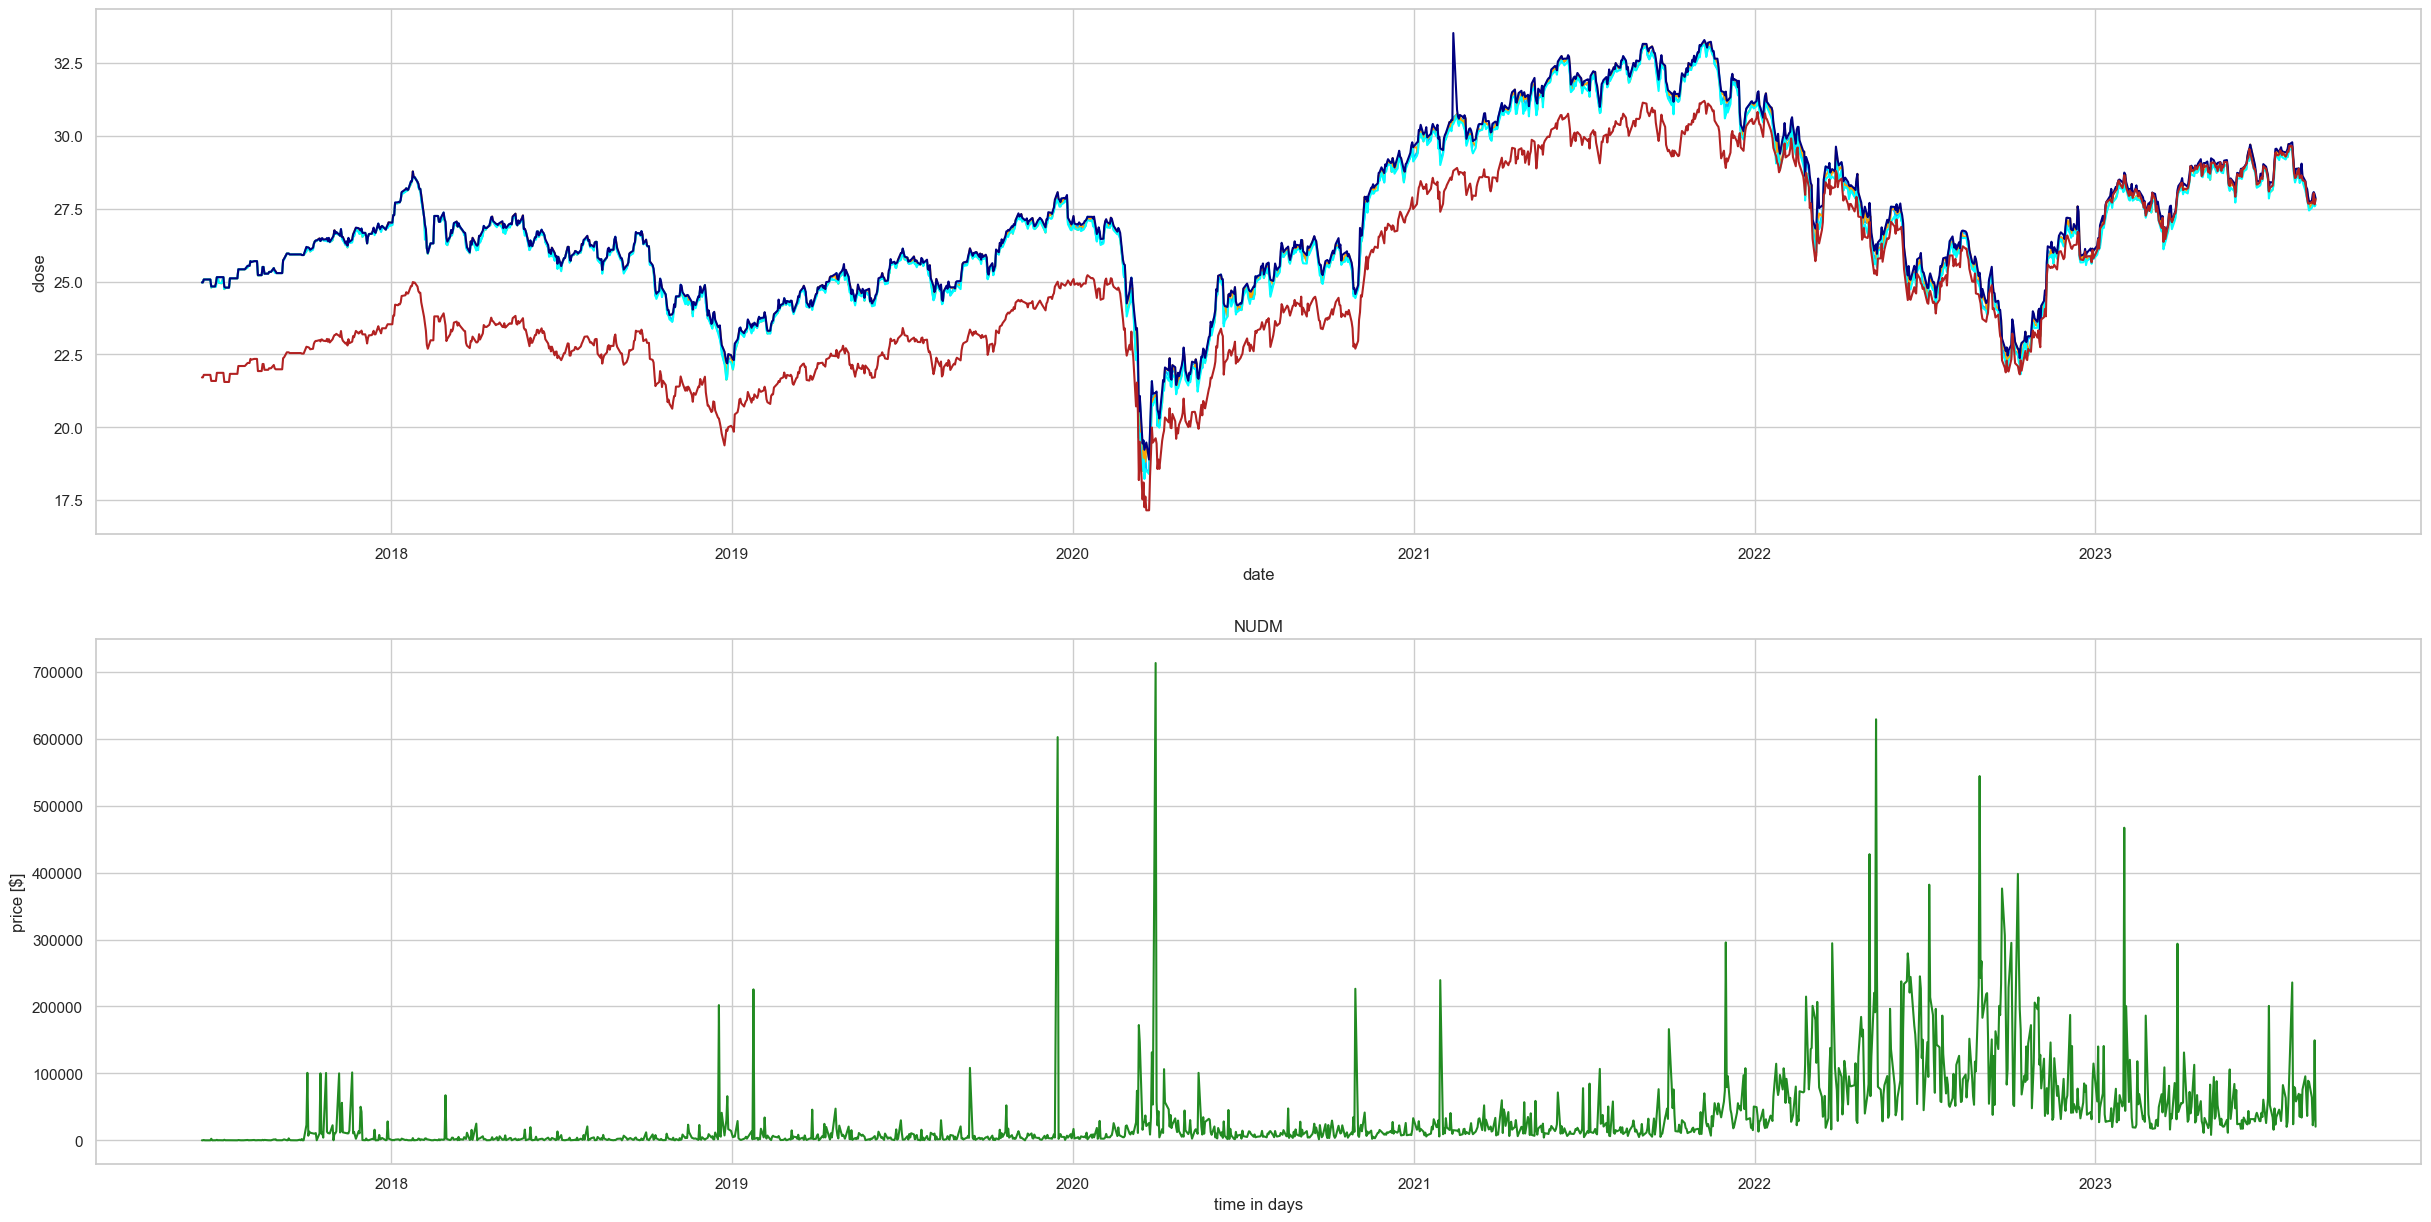

In [45]:
# plot timeseries for NUDM
fig, ax = plt.subplots((2),(1), figsize=(30, 15))
sns.set_theme(style="whitegrid")
plt.title('NUDM')
plt.ylabel('price [$]')
plt.xlabel('time in days')
ax1=ax[0]
ax2=ax[1]
sns.lineplot(x=ts_nudm['date'], y=ts_nudm['close'], ax=ax1, color='deepskyblue')
sns.lineplot(x=ts_nudm['date'], y=ts_nudm['open'], ax=ax1, color='orange')
sns.lineplot(x=ts_nudm['date'], y=ts_nudm['low'], ax=ax1, color='cyan')
sns.lineplot(x=ts_nudm['date'], y=ts_nudm['high'], ax=ax1, color='navy')
sns.lineplot(x=ts_nudm['date'], y=ts_nudm['adjclose'], ax=ax1, color='firebrick')
sns.lineplot(x=ts_nudm['date'], y=ts_nudm['volume'], ax=ax2, color='forestgreen')

_______

In [46]:
#ts_nudm_fc = ts_nudm_fc.set_index('date').drop("symbol", axis=1)
ts_nudm_fc = pd.DataFrame(ts_nudm_fc[['ds', 'y']]).reset_index(drop=True)
ts_nudm_fc

,ds,y
0,2017-06-12,24.969999
1,2017-06-13,24.969999
2,2017-06-14,25.070000
3,2017-06-15,25.070000
4,2017-06-16,25.070000
...,...,...
1558,2023-08-21,27.730000
1559,2023-08-22,27.680000
1560,2023-08-23,28.030001
1561,2023-08-24,27.650000


In [47]:
ts_nudm_fc.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [48]:
import prophet
from prophet import Prophet
import pystan

In [49]:
prophet=Prophet(daily_seasonality=True)
prophet.fit(ts_nudm_fc)

DEBUG:cmdstanpy:input tempfile: /var/folders/b7/z37t9wv944zbx0thnr6_q22c0000gn/T/tmp90z3njk7/q7_tq3h9.json
DEBUG:cmdstanpy:input tempfile: /var/folders/b7/z37t9wv944zbx0thnr6_q22c0000gn/T/tmp90z3njk7/kd3h2egm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/opt/homebrew/Caskroom/miniconda/base/envs/ml_env/lib/python3.11/site-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80974', 'data', 'file=/var/folders/b7/z37t9wv944zbx0thnr6_q22c0000gn/T/tmp90z3njk7/q7_tq3h9.json', 'init=/var/folders/b7/z37t9wv944zbx0thnr6_q22c0000gn/T/tmp90z3njk7/kd3h2egm.json', 'output', 'file=/var/folders/b7/z37t9wv944zbx0thnr6_q22c0000gn/T/tmp90z3njk7/prophet_modeljaupmv9g/prophet_model-20230826234356.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:43:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:43:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1]

RuntimeError: Error during optimization! Command '/opt/homebrew/Caskroom/miniconda/base/envs/ml_env/lib/python3.11/site-packages/prophet/stan_model/prophet_model.bin random seed=39229 data file=/var/folders/b7/z37t9wv944zbx0thnr6_q22c0000gn/T/tmp90z3njk7/z4uqa9dz.json init=/var/folders/b7/z37t9wv944zbx0thnr6_q22c0000gn/T/tmp90z3njk7/7itftvqa.json output file=/var/folders/b7/z37t9wv944zbx0thnr6_q22c0000gn/T/tmp90z3njk7/prophet_modelqsmu52vf/prophet_model-20230826234357.csv method=optimize algorithm=newton iter=10000' failed: console log output:

dyld[4762]: Library not loaded: @rpath/libtbb.dylib
  Referenced from: <C18D8E80-A579-3EBA-AEDA-3B81BB6181C6> /opt/homebrew/Caskroom/miniconda/base/envs/ml_env/lib/python3.11/site-packages/prophet/stan_model/prophet_model.bin
  Reason: tried: '/private/var/folders/b7/z37t9wv944zbx0thnr6_q22c0000gn/T/pip-install-d5nskpcz/prophet_1d082197e8e24a499de373aac55e2f12/build/lib.macosx-11.0-arm64-cpython-311/prophet/stan_model/cmdstan-2.31.0/stan/lib/stan_math/lib/tbb/libtbb.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/private/var/folders/b7/z37t9wv944zbx0thnr6_q22c0000gn/T/pip-install-d5nskpcz/prophet_1d082197e8e24a499de373aac55e2f12/build/lib.macosx-11.0-arm64-cpython-311/prophet/stan_model/cmdstan-2.31.0/stan/lib/stan_math/lib/tbb/libtbb.dylib' (no such file), '/private/var/folders/b7/z37t9wv944zbx0thnr6_q22c0000gn/T/pip-install-d5nskpcz/prophet_1d082197e8e24a499de373aac55e2f12/build/lib.macosx-11.0-arm64-cpython-311/prophet/stan_model/cmdstan-2.31.0/stan/lib/stan_math/lib/tbb/libtbb.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/private/var/folders/b7/z37t9wv944zbx0thnr6_q22c0000gn/T/pip-install-d5nskpcz/prophet_1d082197e8e24a499de373aac55e2f12/build/lib.macosx-11.0-arm64-cpython-311/prophet/stan_model/cmdstan-2.31.0/stan/lib/stan_math/lib/tbb/libtbb.dylib' (no such file), '/private/var/folders/b7/z37t9wv944zbx0thnr6_q22c0000gn/T/pip-install-d5nskpcz/prophet_1d082197e8e24a499de373aac55e2f12/build/lib.macosx-11.0-arm64-cpython-311/prophet/stan_model/cmdstan-2.31.0/stan/lib/stan_math/lib/tbb/libtbb.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/private/var/folders/b7/z37t9wv944zbx0thnr6_q22c0000gn/T/pip-install-d5nskpcz/prophet_1d082197e8e24a499de373aac55e2f12/build/lib.macosx-11.0-arm64-cpython-311/prophet/stan_model/cmdstan-2.31.0/stan/lib/stan_math/lib/tbb/libtbb.dylib' (no such file), '/private/var/folders/b7/z37t9wv944zbx0thnr6_q22c0000gn/T/pip-install-d5nskpcz/prophet_1d082197e8e24a499de373aac55e2f12/build/lib.macosx-11.0-arm64-cpython-311/prophet/stan_model/cmdstan-2.31.0/stan/lib/stan_math/lib/tbb/libtbb.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/private/var/folders/b7/z37t9wv944zbx0thnr6_q22c0000gn/T/pip-install-d5nskpcz/prophet_1d082197e8e24a499de373aac55e2f12/build/lib.macosx-11.0-arm64-cpython-311/prophet/stan_model/cmdstan-2.31.0/stan/lib/stan_math/lib/tbb/libtbb.dylib' (no such file), '/usr/local/lib/libtbb.dylib' (no such file), '/usr/lib/libtbb.dylib' (no such file, not in dyld cache)


In [ ]:
import requests
from requests import get
import json
from json import dumps
from json import loads

ts = get(select_ts)

In [ ]:
select_ts = pd.DataFrame(select_ts)

select_ts.to_csv('/Users/kk/Desktop/da_capstone_group3/Team3_App/select_ts.csv')

In [ ]:
select_ts = pd.read_csv('/Users/kk/Desktop/da_capstone_group3/Team3_App/select_ts.csv')
select_ts

,Unnamed: 0


In [ ]:
ts['date']

KeyError: 'date'

In [ ]:
ts.info()

ts['date'] = pd.to_datetime(ts.date)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Empty DataFrame


AttributeError: 'DataFrame' object has no attribute 'date'

In [ ]:
for t in t_list:
    T_list = []
    T = yq.Ticker('f"{selection.ticker[t]}"')
    (f'{T}.info') = info[t]
    
    print(info[t])
    



    


    

SyntaxError: cannot assign to f-string expression here. Maybe you meant '==' instead of '='? (3970728884.py, line 4)

In [ ]:
for st in t_list:
    ts = pd.to_datetime(ts).reset_index(inplace=True)
    print(ts)

In [ ]:
for t in t_list:
    ts['date'] = pd.to_datetime(ts['date'])
    print(ts)

In [ ]:
import yahooquery as yq 
from yahooquery import Ticker 
from yahooquery import Screener
from yfinance import ticker
import googlefinance as gf
from googlefinance import getQuotes
import from json import normalize

t_list = selection.ticker
for t in t_list:
    t= selection.ticker.str.lower() 

t = yf.Ticker('f"{selection.ticker}"')

for t in t_list:
    
    t = yf.Ticker('f"{selection.ticker}"')
    print(f'"{t}"'.info)



In [ ]:

# List of ticker symbols
ticker_symbols = ('f"{selection.ticker}"') # Add more tickers as needed

# Initialize an empty DataFrame to store combined holdings
combined_holdings = pd.DataFrame()

for ticker in ticker_symbols:
    # Fetch fund holding info for the current ticker
    fund = yf.Ticker("{f'{ticker_symbols[t]}}'")
    fund_holdings = fund.fund_holding_info
    
    # Create DataFrame for current fund's holdings
    if ticker.lower() in fund_holdings:
        df = pd.DataFrame(fund_holdings[ticker.lower()]['holdings'])
        
        # Add a column for the current ticker symbol
        df['Ticker'] = ticker
        
        # Append the current fund's holdings to the combined DataFrame
        combined_holdings = combined_holdings.append(df, ignore_index=True)

# Print the combined holdings DataFrame
print(combined_holdings.head())


NameError: name 'pd' is not defined

In [ ]:
t_list = selection.ticker
for t in t_list:
    t= selection.ticker.str.lower() 


for t in t_list:
    yf_list = []
    yf_tic = yf.Ticker(f'selection.ticker["{t}"]')
    yf_list.append(yf_tic)
    print(yf_list)



NameError: name 'selection' is not defined

In [ ]:

fund = yq.Ticker('f"{t}"')
fund.fund_holding_info.keys()
#dict_keys(['hasgx'])

for t in selection.ticker:
    fund = yq.Ticker('f"{selection.ticker[t]}"')
    print(fund.fund_holding_info.keys())
from yahooquery import Ticker
from yfinance import ticker        
from yahooquery import Screener
import yahooquery as yq
import yahooquery
from yahooquery import 
from json import getjson                    

df_fund = pd.DataFrame(fund.get_holdings['ewu']['holdings'])

ewu = pd.DataFrame(fund_holding_info['ewu']['holdings'])

print(ewu)

SyntaxError: invalid syntax (181518991.py, line 13)

In [ ]:
ewu=yq.Ticker('EWU')
eirl.get_trend_details

NameError: name 'eirl' is not defined

In [ ]:
import yfinance as yf
ewu=yf.Ticker("NUDM")
fetch(nudm.info)

('NUDM')

NameError: name 'fetch' is not defined

In [ ]:

from yahooquery import fund
ticker('VGK') =  vgk.fund.get_['VGK']['holdings']

print(vgk)

SyntaxError: cannot assign to function call here. Maybe you meant '==' instead of '='? (1121097802.py, line 2)

In [ ]:
nudm=yf.Ticker('NUDM')

print(nudm.get_trend_details)

get_history_metadata()



get.historic()



<bound method TickerBase.get_trend_details of yfinance.Ticker object <NUDM>>


In [ ]:
print(nudm.fund_holding_info'yf_list'))

AttributeError: 'Ticker' object has no attribute 'fund_holding_info'

In [ ]:
nmdu.yf_Ticker('NMDU').fund_holding_info()

AttributeError: 'Ticker' object has no attribute 'yf_Ticker'

In [ ]:
t_list = selection.ticker
for t in t_list:
    t= selection.ticker.str.lower() 
    print(t)

In [ ]:

for t in t_list:
    
    t = yf.Ticker('f"{selection.ticker}"')
    print(f'"{t}"'.info)

In [ ]:
t_list = selection.ticker
for t in t_list:
    t= selection.ticker.str.lower() 
    print(t)



In [ ]:
print(nudm_HOLD)
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('NUDM Holdings')
ax.tick_params(labelrotation=60)
sns.barplot(x='holdingName', y= 'holdingPercent', data=nudm_HOLD.sort_values(by='holdingPercent', ascending=False), color='deepskyblue')

NameError: name 'nudm_HOLD' is not defined

---------

In [ ]:
import pandas as pd
import yahooquery as yq
from yahooquery import Ticker
from yfinance import ticker
import yahooquery.misc 
import yahooquery.screener
import yahooquery.utils
import yahooquery.research

import yq_Ticker_object
import yfinance as yf
import time


ModuleNotFoundError: No module named 'yq_Ticker_object'

In [ ]:
# Create a Ticker object for the ticker symbol 'SPY'
ticker_obj = yq.ticker.Ticker('EIRL')

# Get the fund holding information in JSON format
fund_info_json = ticker_obj.fund_holding_info

# Convert the JSON dictionary to a pandas DataFrame
fund_info_df = pd.DataFrame(fund_info_json['EIRL']['holdings'])

# Print the DataFrame
#print(fund_info_df)
fund_info_df


In [ ]:
import pandas as pd
for t in t_list:
    yq_list = [] 
    t = yq.Ticker('f"{selection.ticker[t]}"')
    ticker_obj = fund
    fund.fund_get_holdings(T)
    yq_list.append(ticker_obj)
    pd.to_Dataframe(yq_list)

AttributeError: 'Ticker' object has no attribute 'fund_get_holdings'

In [ ]:
t_list = selection.ticker
for t in t_list:
    T= selection.ticker
    print(f"'{T}'")

NameError: name 'selection' is not defined

In [ ]:
t_list = selection.ticker
for t in t_list:
    t= selection.ticker.str.lower() 
    print(t)

0      vgk
1      ezu
2     bbeu
3     ieur
4      ewu
5      fez
6      iev
7      ewg
8     eufn
9     hedj
10     ewl
11     ewq
12     ewp
13    flgb
14    speu
15    dbeu
16    nudm
17    hezu
18     ewd
19     ewn
20     fep
21    eden
22     fdd
23     fsz
24    flee
25    eirl
26    eudg
27     dax
28    eusc
29    norw
30     ewo
31    flsw
32    ewus
33    pteu
34    dbez
35    hewg
36    fleh
37    enor
38     fku
39     ewk
40    efnl
41    flgr
42    gseu
43    pgal
44    dbgr
45    rfeu
46    eudv
47    hewu
48    flfr
Name: ticker, dtype: object
0      vgk
1      ezu
2     bbeu
3     ieur
4      ewu
5      fez
6      iev
7      ewg
8     eufn
9     hedj
10     ewl
11     ewq
12     ewp
13    flgb
14    speu
15    dbeu
16    nudm
17    hezu
18     ewd
19     ewn
20     fep
21    eden
22     fdd
23     fsz
24    flee
25    eirl
26    eudg
27     dax
28    eusc
29    norw
30     ewo
31    flsw
32    ewus
33    pteu
34    dbez
35    hewg
36    fleh
37    enor
38     fku
39  

In [ ]:

ticker_obj[t] = yq.ticker.Ticker(T)
for t in t_list: 
    ticker_obj['f"{t}"'] = yq.ticker.Ticker('f"{T}"')
    T_objects = []
    T_objects.append(ticker_obj)
    print(T_objects)



TypeError: 'Ticker' object does not support item assignment

In [ ]:
ticker_obj = yq.ticker.Ticker('VGK')

In [ ]:
fund_info_json = ticker_obj.fund_holding_info

In [ ]:

fund_info_df = pd.DataFrame(fund_info_json['VGK']['holdings'])

In [ ]:
fund_info_df

,symbol,holdingName,holdingPercent
0,NESN,Nestle SA,0.028014
1,ASML,ASML Holding NV,0.024164
2,NOVO B,Novo Nordisk A/S Class B,0.021598
3,MC,LVMH Moet Hennessy Louis Vuitton SE,0.019666
4,ROG,Roche Holding AG,0.018402
5,AZN,AstraZeneca PLC,0.018173
6,NOVN,Novartis AG Registered Shares,0.018070
7,SHEL,Shell PLC,0.017767
8,HSBA,HSBC Holdings PLC,0.014211
9,SAP,SAP SE,0.012808


In [ ]:
fund_info_df.holdingPercent.sum()

0.19287210049999998

In [ ]:
hold_spy = fund.asset_profile
print(hold_spy)

{'f': {'address1': 'One American Road', 'city': 'Dearborn', 'state': 'MI', 'zip': '48126-1899', 'country': 'United States', 'phone': '313 322 3000', 'website': 'https://www.ford.com', 'industry': 'Auto Manufacturers', 'industryDisp': 'Auto Manufacturers', 'sector': 'Consumer Cyclical', 'sectorDisp': 'Consumer Cyclical', 'longBusinessSummary': 'Ford Motor Company develops, delivers, and services a range of Ford trucks, commercial cars and vans, sport utility vehicles, and Lincoln luxury vehicles worldwide. It operates through Ford Blue, Ford Model e, and Ford Pro; Ford Next; and Ford Credit segments. The company sells Ford and Lincoln vehicles, service parts, and accessories through distributors and dealers, as well as through dealerships to commercial fleet customers, daily rental car companies, and governments. It also engages in vehicle-related financing and leasing activities to and through automotive dealers. In addition, the company provides retail installment sale contracts for n

In [ ]:
fund_info_df = pd.DataFrame(fund_info_json['VGK']['asset'])

KeyError: 'asset'

In [ ]:
fund = Ticker('NUDM')

weights = fund.fund_sector_weightings

NameError: name 'Ticker' is not defined

In [ ]:
print(weights)

NameError: name 'weights' is not defined

In [ ]:
weights.VGK.sum()

0.9999999899999998

In [ ]:
vgk = yq.Ticker('VGK')
yq.find_all_modules(vgk)

In [ ]:
pd.read_json(nudm.all_financial_data)

NameError: name 'pd' is not defined

In [ ]:
from git import FetchInfo


FetchInfo(get.json.0x286d41c90)

SyntaxError: invalid decimal literal (189441969.py, line 4)

In [ ]:
print(data)

NameError: name 'data' is not defined

In [ ]:
from sklearn.conftest import dataset_fetchers


dataset_fetchers




ModuleNotFoundError: No module named 'pytest'

----

In [ ]:
hist_nmdu= yf.Ticker('NMDU').get_history_metadata()

NMDU: No data found, symbol may be delisted


In [ ]:
history(yf.Ticker('NMDU'))

NameError: name 'get_history' is not defined